#Analyzing Product Demand Patterns Using Machine Learning
---

# IT461 — Demand Prediction (Regression)

This project aims to predict how many units of an Amazon product are bought in a month using machine learning. We use product information such as ratings, reviews, prices, discounts, and categories to train different regression models. The notebook includes data cleaning, preprocessing, model training, tuning, and evaluation to find which model predicts product demand most accurately.


**Task:** Predict `purchased_last_month` from product/pricing/review features.  
**Why it matters:** better demand forecasts → smarter inventory & pricing.  
**Inputs:** rating, total_reviews, prices, discount %, category, badges.  
**Output:** numeric prediction = monthly purchases.

#**1.Load Data**

In [ ]:
import pandas as pd
import numpy as np

# Load dataset from Google Drive link
file_id = "1HSW5iak9Hgc5-xrhm4hHRhH3Uqa2sdyT"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

df.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00


## Dataset Overview

- Source: Kaggle (Amazon Products Sales Dataset – 42K Items, 2025)
- Total Rows: 42,675  
- Total Columns: 17

Attributes describe product ratings, prices, categories, discounts, and demand metrics (`purchased_last_month`).

These features collectively capture consumer interest and product performance.


### Dataset Features Description

| **Feature Name** | **Description** |
|------------------|-----------------|
| `product_title` | Complete name or title of the product |
| `product_rating` | Average customer rating (numeric) out of 5 |
| `total_reviews` | Total number of customer reviews |
| `purchased_last_month` | Units purchased in the last month |
| `discounted_price` | Current price after discount |
| `original_price` | Original listed price before discount |
| `discount_percentage` | Percentage discount applied to the product |
| `is_best_seller` | Indicates if the product is tagged as a Best Seller |
| `is_sponsored` | Whether the product is a Sponsored item or Organic |
| `has_coupon` | Shows if special discounted coupons are available (True/False) |
| `buy_box_availability` | Availability of the BuyBox button (e.g., “Add to cart”) |
| `delivery_date` | Estimated delivery date (converted to datetime format) |
| `sustainability_tags` | Eco-friendly and sustainability-related tags |
| `product_image_url` | Direct image link of the product |
| `product_page_url` | Official Amazon product page URL |
| `data_collected_at` | Date when the data was collected |
| `product_category` | Assigned product category based on the product title |


In [ ]:
df.info()

df.describe()

print("Dataset shape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 15  product_category   

#**2.Preprocessing**

## Missing values

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
product_title               0
product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability    14653
delivery_date           11983
sustainability_tags     39267
product_image_url           0
product_page_url         2069
data_collected_at           0
product_category            0
discount_percentage      2062
dtype: int64


**Before cleaning**, A large portion of the dataset contained missing values, especially in:
- `buy_box_availability`
- pricing fields

## Duplicate

In [ ]:
total_duplicates = df.duplicated().sum()

print("Total exact duplicate rows found:", total_duplicates)

Total exact duplicate rows found: 0


There were **no duplicate** rows found

## Data Cleaning

### 1- Removing irrelevant columns

In [ ]:
# Drop columns that are not useful for modeling
df = df.drop(columns=[
    'product_title',
    'product_page_url',
    'product_image_url',
    'delivery_date',
    'sustainability_tags',
    'data_collected_at'
], errors='ignore')

print("Dropped irrelevant columns.")
print("Remaining columns:", df.columns.tolist())


Dropped irrelevant columns.
Remaining columns: ['product_rating', 'total_reviews', 'purchased_last_month', 'discounted_price', 'original_price', 'is_best_seller', 'is_sponsored', 'has_coupon', 'buy_box_availability', 'product_category', 'discount_percentage']


**Removed irrelevant columns** such as `product_title`, URLs, and date fields that do not influence prediction.  


### 2- Handle missing values

In [ ]:
numeric_cols = ['product_rating', 'total_reviews', 'discounted_price',
                'original_price', 'discount_percentage']

# Fill missing numeric values with mean
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

# Drop rows where the target (purchased_last_month) is missing
df = df.dropna(subset=['purchased_last_month'])

# Categorical columns to fill with 'Not available'
categorical_cols = ['buy_box_availability']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Not available')


print("Missing values handled successfully!")
print("New shape:", df.shape)


Missing values handled successfully!
New shape: (32164, 11)


**Handled missing values**  
   - Filled numeric columns with their **mean values**.  
   - Dropped rows where `purchased_last_month` was missing.  
   - Replaced empty categorical fields (e.g., `buy_box_availability`) with `"Not available"`.  




In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
product_rating          0
total_reviews           0
purchased_last_month    0
discounted_price        0
original_price          0
is_best_seller          0
is_sponsored            0
has_coupon              0
buy_box_availability    0
product_category        0
discount_percentage     0
dtype: int64


After cleaning, the dataset contained **32 164 rows × 11 columns**, free from missing values

This ensures consistent and reliable input for modeling.

##**3. Encoding**


In [ ]:
# Encode 'is_sponsored'
if 'is_sponsored' in df.columns:
    df['is_sponsored'] = df['is_sponsored'].apply(lambda x: 1 if str(x).strip().lower() == 'sponsored' else 0)

# Encode 'buy_box_availability'
if 'buy_box_availability' in df.columns:
    df['buy_box_availability'] = df['buy_box_availability'].apply(
        lambda x: 1 if str(x).strip().lower() == 'add to cart' else 0
    )

# Encode 'has_coupon'
if 'has_coupon' in df.columns:
    df['has_coupon'] = df['has_coupon'].apply(
        lambda x: 0 if str(x).strip().lower() == 'no coupon' else 1
    )

# Replace any value that starts with "Save" by a single label "SavedPercent"
df['is_best_seller'] = df['is_best_seller'].replace(to_replace=r'^Save.*', value='SavedPercent', regex=True)

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=['is_best_seller'], prefix='is_best_seller', drop_first=False, dtype=int)

categorical_cols = ['product_category']
if 'product_category' in df.columns:
    df['product_category'] = df['product_category'].str.replace("&amp;", "&", regex=False)

df= pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print("Shape after encoding:", df.shape)
df.head(10)

Shape after encoding: (32164, 29)


,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_sponsored,has_coupon,buy_box_availability,discount_percentage,is_best_seller_Amazon's,...,product_category_Networking,product_category_Other Electronics,product_category_Phones,product_category_Power & Batteries,product_category_Printers & Scanners,product_category_Smart Home,product_category_Speakers,product_category_Storage,product_category_TV & Display,product_category_Wearables
0,4.6,375.0,300.0,89.68,159.00,1,1,1,43.60,0,...,0,0,1,0,0,0,0,0,0,0
1,4.3,2457.0,6000.0,9.99,15.99,1,0,1,37.52,0,...,0,0,0,0,0,0,0,0,0,0
2,4.6,3044.0,2000.0,314.00,349.00,1,0,1,10.03,0,...,0,0,0,0,0,0,0,0,0,0
3,4.6,35882.0,10000.0,162.24,162.24,0,0,0,0.00,0,...,0,0,1,0,0,0,0,0,0,0
4,4.8,28988.0,10000.0,72.74,72.74,0,0,0,0.00,0,...,0,0,1,0,0,0,0,0,0,0
5,4.6,44522.0,100000.0,99.95,99.95,0,0,0,0.00,0,...,0,1,0,0,0,0,0,0,0,0
6,4.5,13466.0,10000.0,88.11,88.11,0,0,0,0.00,0,...,0,0,1,0,0,0,0,0,0,0
7,4.6,38105.0,10000.0,23.04,23.04,0,0,0,0.00,0,...,0,0,1,0,0,0,0,0,0,0
9,4.7,7308.0,10000.0,284.05,284.05,0,0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
10,4.7,865598.0,100000.0,14.99,14.99,0,0,1,0.00,0,...,0,0,0,0,0,0,0,0,0,0


- **Binary Encoding**
  - `is_sponsored`: Sponsored = 1, Organic = 0  
  - `has_coupon`: Has Coupon = 1, No Coupon = 0  
  - `buy_box_availability`: Add to cart = 1, Not available = 0  

- **One-Hot Encoding**
  - Applied to `is_best_seller` and `product_category` to create multiple binary indicator columns.  

After encoding, final dataset shape: **32,164 rows × 29 columns**.

In [ ]:
output_path = "amazon_processed_dataset.csv"

df.to_csv(output_path, index=False)

#**4.Feature Relationships**

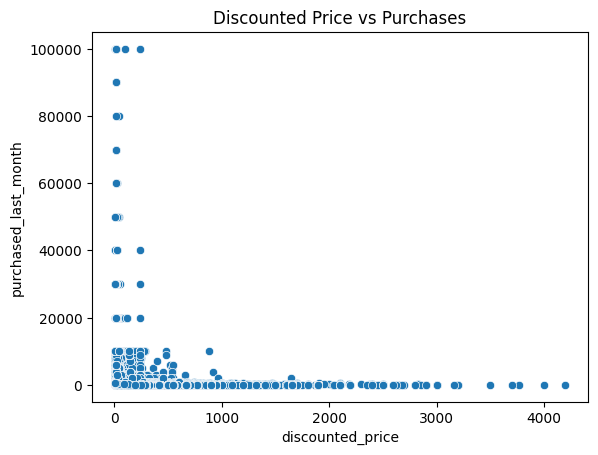

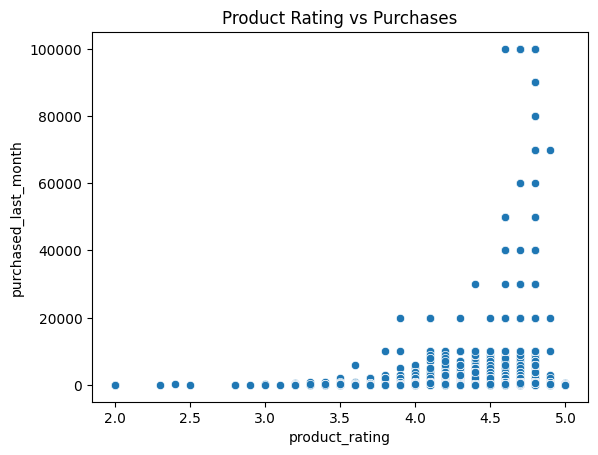

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship examples
sns.scatterplot(x='discounted_price', y='purchased_last_month', data=df)
plt.title("Discounted Price vs Purchases")
plt.show()

sns.scatterplot(x='product_rating', y='purchased_last_month', data=df)
plt.title("Product Rating vs Purchases")
plt.show()



#### Discounted Price vs Purchases
The scatter plot shows that **lower-priced products** tend to have **higher purchase counts**. However, a small number of high-priced items also experience strong sales, likely representing premium or popular brand products.

#### Product Rating vs Purchases
Most products with ratings **between 4.0 and 5.0** correspond to higher purchases, indicating customer trust and satisfaction as major drivers of sales. Low-rated products (below 3.0) rarely achieve high purchase numbers.

These relationships align with real-world e-commerce behavior, where **product reputation and affordability** play central roles in influencing demand.


#**5. Helper Functions**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import joblib
import math

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Performance:")
    print(f"  MAE  : {mae:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  R²   : {r2:.4f}")

    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2}

def plot_feature_importance(model, model_name, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(8,6))
    plt.barh(np.array(feature_names)[indices], importance[indices])
    plt.title(f"{model_name} - Feature Importance")
    plt.show()

def plot_learning_curve(model, model_name, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_absolute_error'
    )
    plt.plot(train_sizes, -train_scores.mean(axis=1), label='Train MAE')
    plt.plot(train_sizes, -test_scores.mean(axis=1), label='Test MAE')
    plt.title(f"{model_name} - Learning Curve")
    plt.xlabel("Training Size")
    plt.ylabel("MAE")
    plt.legend()
    plt.show()

We defined reusable functions to:
- Evaluate models using MAE, RMSE, and R²
- Plot feature importance for tree-based models
- Generate learning curves to diagnose overfitting or underfitting

# **6. Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data
target = 'purchased_last_month'
X = df.drop(columns=[target])
y = df[target]

#80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split complete")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Data split complete
Training shape: (25731, 28)
Testing shape: (6433, 28)


We split the dataset into:
- **80% training**
- **20% testing**

A larger training set helps models learn better patterns from the data, while the held-out test set evaluates how well the models generalize to unseen samples.

The resulting shapes:
- Training: 25,731 rows
- Testing: 6,433 rows


#**7. Models**


We trained four models:

1. **Linear Regression (Baseline)**
2. **Decision Tree (Tuned)**
3. **Random Forest (Tuned)**
4. **Gradient Boosting (Tuned)**

Each model serves a different level of complexity.  
We used **RandomizedSearchCV** to tune Decision Tree, Random Forest, and Gradient Boosting for optimal performance.

Why this matters:
- Linear Regression establishes a simple baseline
- Tree-based models capture nonlinear interactions between product features
- Hyperparameter tuning ensures we maximize each model’s performance


##**7.1 Baseline Model: Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression on the original (non-scaled) data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Evaluate
lr_results = evaluate_model("Linear Regression (Baseline)", lr_model, X_test, y_test)

lr_mae  = lr_results["MAE"]
lr_rmse = lr_results["RMSE"]
lr_r2   = lr_results["R2"]

# results list
results = []

results.append(lr_results)


Linear Regression (Baseline) Performance:
  MAE  : 1729.60
  RMSE : 4885.12
  R²   : 0.2740


We first trained a Linear Regression model as a simple baseline, since it is the most basic regression model and provides a reference point for evaluating more advanced methods.
However, it performed poorly on our dataset (MAE ≈ 1730, R² ≈ 0.27) because the target variable is highly skewed and the feature target relationships are nonlinear.
This weak baseline confirms that more expressive models are needed for accurate prediction.

##**7.2 Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV

# cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Base Decision Tree model
dt = DecisionTreeRegressor(random_state=42)

# Hyperparameter search space
dt_param_dist = {
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10, 20],
    "max_features": ["sqrt", "log2", None]
}

# Randomized Search
dt_search = RandomizedSearchCV(
    dt,
    dt_param_dist,
    n_iter=12,
    scoring="neg_mean_absolute_error",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Train search
dt_search.fit(X_train, y_train)

# Best model
best_dt = dt_search.best_estimator_
print("Best Decision Tree params:", dt_search.best_params_)

# Evaluate best DT
dt_results = evaluate_model("Decision Tree (Best)", best_dt, X_test, y_test)

dt_mae  = dt_results["MAE"]
dt_rmse = dt_results["RMSE"]
dt_r2   = dt_results["R2"]

results.append(dt_results)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Decision Tree params: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
Decision Tree (Best) Performance:
  MAE  : 333.50
  RMSE : 2332.92
  R²   : 0.8344


The tuned Decision Tree significantly outperformed the baseline model:
- **MAE ≈ 333**
- **R² ≈ 0.83**

Decision Trees handle:
- Nonlinear relationships
- Interactions between encoded variables

The improvement demonstrates that the dataset benefits from models that can split on complex feature combinations.


##**7.3 Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    max_features='sqrt',
    max_samples=0.7
)

rf_param_dist = {
    "n_estimators": [100, 150, 200],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_search = RandomizedSearchCV(
    rf,
    rf_param_dist,
    n_iter=12,
    scoring="neg_mean_absolute_error",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print("Best Random Forest params:", rf_search.best_params_)

rf_results = evaluate_model("Random Forest (Best)", best_rf, X_test, y_test)

rf_mae = rf_results["MAE"]
rf_rmse = rf_results["RMSE"]
rf_r2 = rf_results["R2"]
results.append(rf_results)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Random Forest params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Random Forest (Best) Performance:
  MAE  : 249.93
  RMSE : 1412.45
  R²   : 0.9393


Random Forest achieved the **best results overall**:
- **MAE ≈ 250**
- **R² ≈ 0.94**

This model benefits from:
- Combining many decision trees (bagging)
- Reducing overfitting through randomness
- Handling high-dimensional, encoded data effectively

It is the strongest model for our dataset.


##**7.4 Gradient Boosting Regressor**

In [ ]:
gbr = GradientBoostingRegressor(
    random_state=42,
    n_iter_no_change=5,
    validation_fraction=0.1
)

gbr_param_dist = {
    "n_estimators": [200, 300, 400],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [2, 3],
    "subsample": [0.8, 1.0]
}

gbr_search = RandomizedSearchCV(
    gbr,
    gbr_param_dist,
    n_iter=10,
    scoring="neg_mean_absolute_error",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

gbr_search.fit(X_train, y_train)
best_gbr = gbr_search.best_estimator_
print("Best Gradient Boosting params:", gbr_search.best_params_)

gbr_results = evaluate_model("Gradient Boosting (Best)", best_gbr, X_test, y_test)

gbr_mae  = gbr_results["MAE"]
gbr_rmse = gbr_results["RMSE"]
gbr_r2   = gbr_results["R2"]
results.append(gbr_results)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Gradient Boosting params: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.2}
Gradient Boosting (Best) Performance:
  MAE  : 492.90
  RMSE : 1731.67
  R²   : 0.9088


Gradient Boosting performed very well:
- **MAE ≈ 492**
- **R² ≈ 0.90**

Although slightly worse than Random Forest, it still captures strong nonlinear patterns and improves accuracy by sequentially correcting errors from previous trees.


#**8. Model Comparison**

In [ ]:
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "MAE":  [lr_mae, dt_mae, rf_mae, gbr_mae],
    "RMSE": [lr_rmse, dt_rmse, rf_rmse, gbr_rmse],
    "R2":   [lr_r2, dt_r2, rf_r2, gbr_r2]
})

display(results_df)


,Model,MAE,RMSE,R2
0,Linear Regression,1729.602597,4885.120768,0.274039
1,Decision Tree,333.498223,2332.915727,0.834438
2,Random Forest,249.932943,1412.446284,0.939311
3,Gradient Boosting,492.897741,1731.667050,0.908780


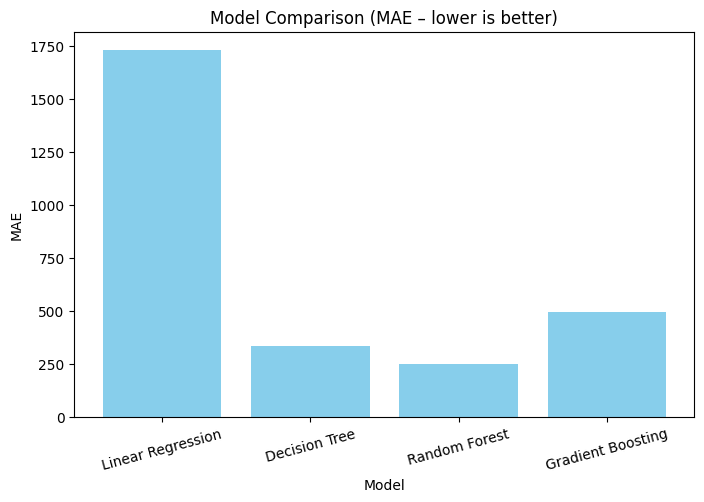

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["MAE"], color='skyblue')
plt.title("Model Comparison (MAE – lower is better)")
plt.xlabel("Model")
plt.ylabel("MAE")
plt.xticks(rotation=15)
plt.show()

Across all four models, Random Forest achieved the highest accuracy (lowest MAE, highest R²), followed by Gradient Boosting and the tuned Decision Tree.

Linear Regression performed significantly worse than the others, confirming that nonlinear models are essential for this dataset.

The comparison demonstrates the value of ensemble learning for demand prediction.


#**9. Feature Importance**

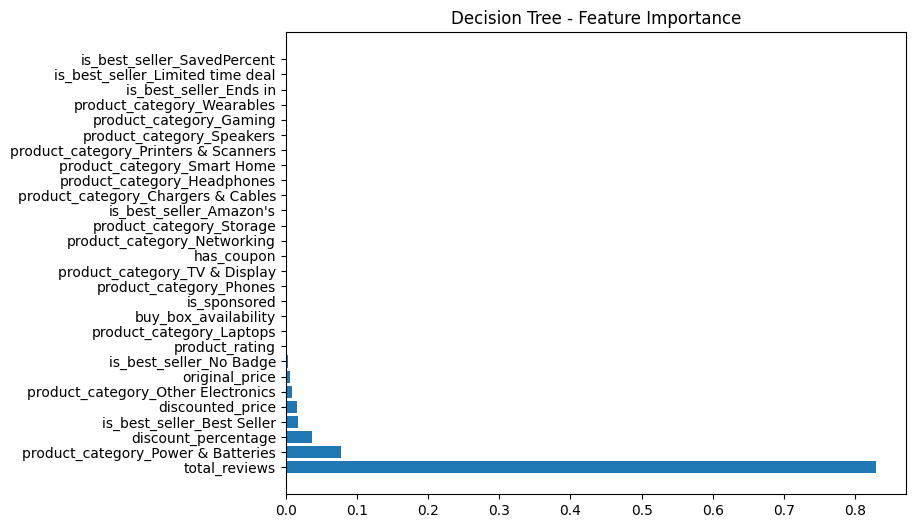

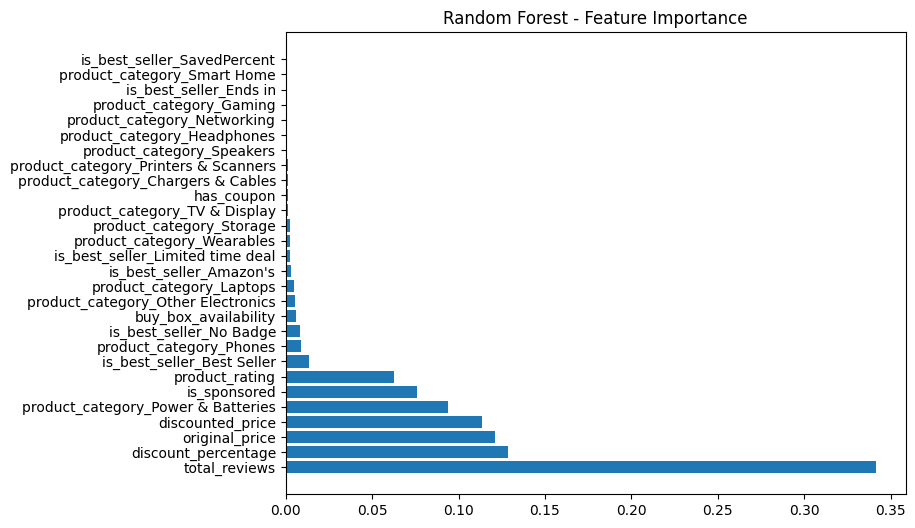

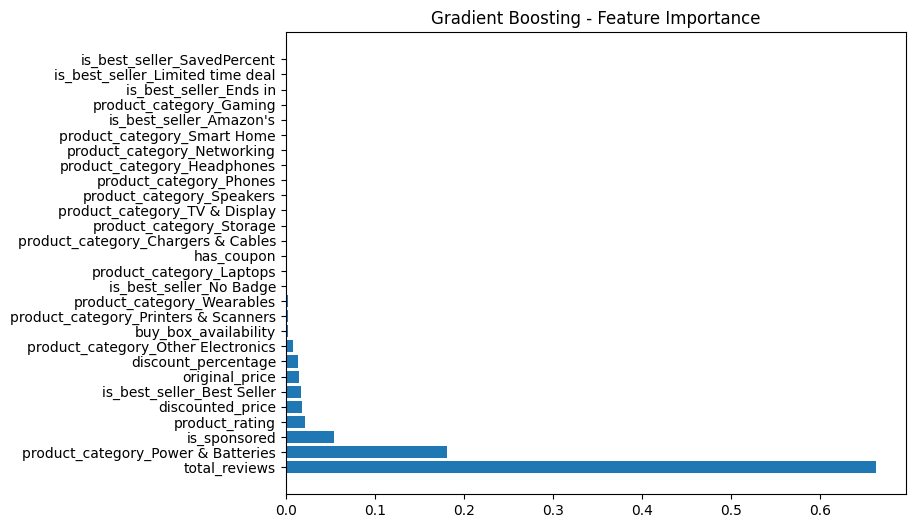

In [ ]:
plot_feature_importance(best_dt, "Decision Tree", X.columns)
plot_feature_importance(best_rf, "Random Forest", X.columns)
plot_feature_importance(best_gbr, "Gradient Boosting", X.columns)


## 9. Feature Importance

Feature importance plots reveal which factors most influence product demand.

most important feature across models:
- `total_reviews`


These insights help retailers understand which product attributes drive monthly purchases.


#**10. Learning Curve**

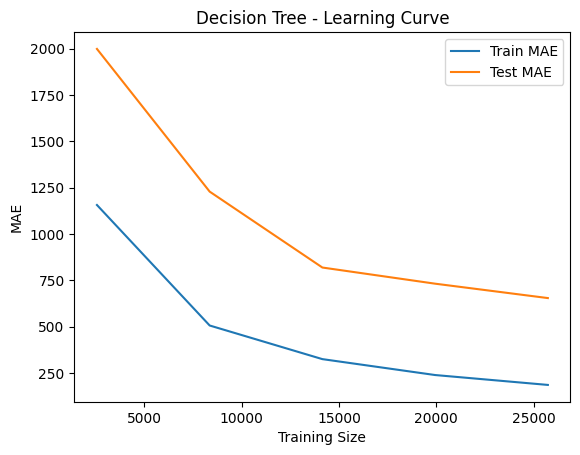

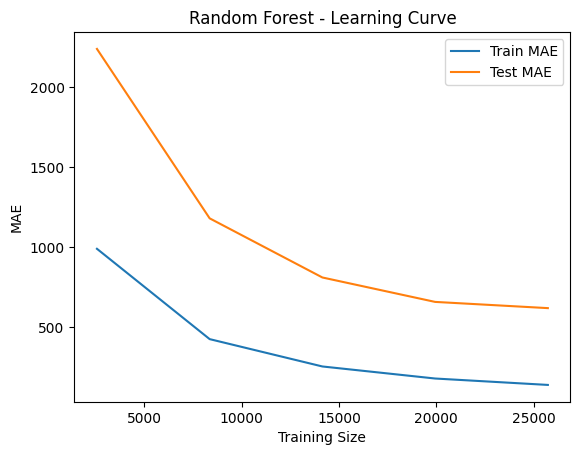

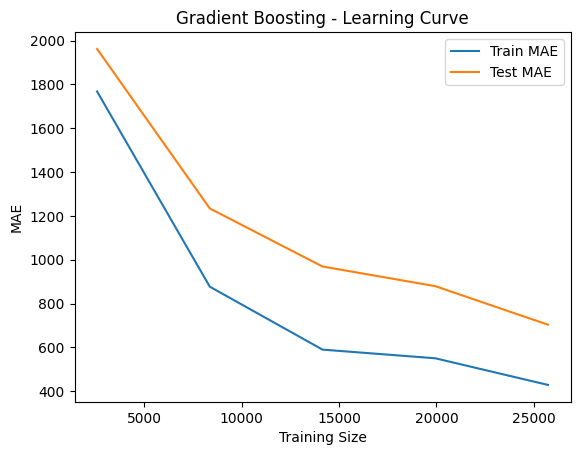

In [ ]:
plot_learning_curve(best_dt, "Decision Tree", X, y)
plot_learning_curve(best_rf, "Random Forest", X, y)
plot_learning_curve(best_gbr, "Gradient Boosting", X, y)

Learning curves show:

The Decision Tree learns quickly and achieves very low training error, but its test error starts high and decreases more slowly. This shows a little overfitting: the model memorizes the training data but does not generalize as well. More training data helps reduce this gap, but some overfitting remains.



Random Forest shows much better generalization. Both training and test MAE decrease steadily, and the gap between them is smaller. The model clearly benefits from more data and avoids most of the overfitting seen in the Decision Tree, which explains its strong overall performance.


Gradient Boosting improves consistently as training size increases. The test MAE drops steadily, though the gap between training and test errors is slightly larger than Random Forest. This means the model still overfits a bit but continues to learn meaningful patterns with more data.



#**11. Live Testing on 5 Samples**

In [ ]:
sample_test = X_test.sample(5, random_state=42)
sample_truth = y_test.loc[sample_test.index]


In [ ]:
import joblib

# Save the models first
joblib.dump(best_dt, "Decision_tree_regressor.pkl")
joblib.dump(best_rf, "best_random_forest.pkl")
joblib.dump(best_gbr, "best_gradient_boosting.pkl")

# Then load the models
dt = joblib.load("Decision_tree_regressor.pkl")
rf = joblib.load("best_random_forest.pkl")
gbr = joblib.load("best_gradient_boosting.pkl")

In [ ]:
pred_dt  = dt.predict(sample_test)
pred_rf  = rf.predict(sample_test)
pred_gbr = gbr.predict(sample_test)


In [ ]:
pd.DataFrame({
    "Truth": sample_truth,
    "DT_Pred": pred_dt,
    "RF_Pred": pred_rf,
    "GBR_Pred": pred_gbr
})


,Truth,DT_Pred,RF_Pred,GBR_Pred
7368,100.0,122.222222,219.0,255.640018
24286,50.0,50.000000,50.0,141.898610
40725,200.0,200.000000,200.0,255.640018
34196,200.0,246.414343,200.0,255.640018
5275,500.0,877.777778,923.0,117.067061


The table above shows how each trained model predicts demand for five unseen product samples.  
These examples allow us to compare the models on individual cases:

- **Decision Tree** often predicts exact or near-exact values when the input matches patterns it has learned. However, it can sometimes overfit and produce sharp jumps, especially for higher demand levels.
- **Random Forest** produces the most stable and accurate predictions, staying very close to the true values across all samples. This matches its overall best performance in the full evaluation (lowest MAE and highest R²).
- **Gradient Boosting** also performs well but tends to smooth its predictions more aggressively, sometimes underestimating or overestimating individual cases.

Overall, Random Forest demonstrates the strongest generalization on both the full test set and the small sample tested manually, confirming it as the best-performing model in this project.
